In [115]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv("benchmarking.csv")
df.head()

,procs,N,execution_time,num_of_unique
0,1,10000,9.563765,22504348
1,2,10000,6.008358,22504348
2,3,10000,4.362962,22504348
3,4,10000,3.539696,22504348
4,5,10000,2.774939,22504348


In [117]:
N_10000 = df[df["N"] == 10000]
N_20000 = df[df["N"] == 20000]
N_50000 = df[df["N"] == 50000]
N_50000.head()

,procs,N,execution_time,num_of_unique
80,1,50000,1796.431153,534772334
81,2,50000,730.538627,534772334
82,3,50000,375.237810,534772334
83,4,50000,280.603866,534772334
84,5,50000,174.027330,534772334


Text(0, 0.5, 'Execution Time (s)')

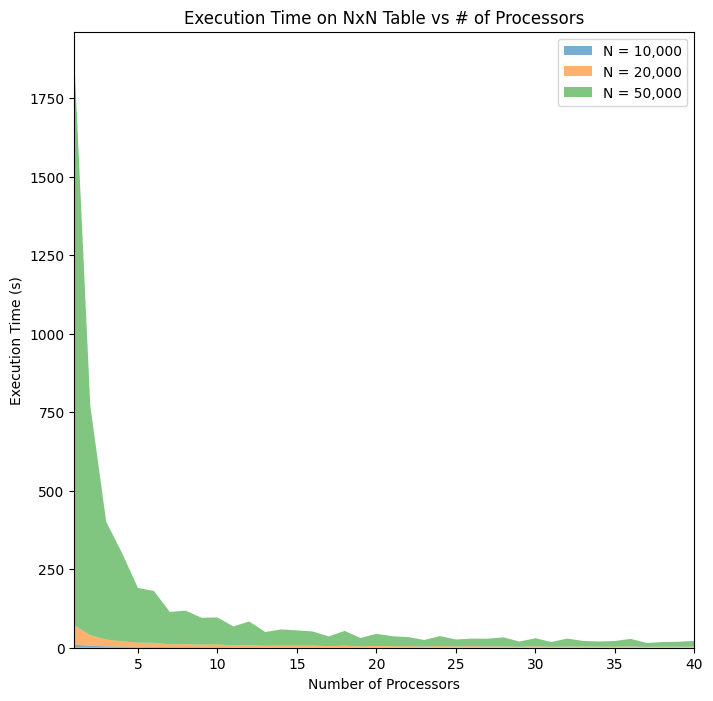

In [118]:
fig, ax = plt.subplots(figsize=(8,8))

# Stack plot of execution time speed up on different sized multiplication tables
ax.stackplot(N_10000["procs"],
             N_10000["execution_time"],
             N_20000["execution_time"], 
             N_50000["execution_time"],
             alpha= 0.6, 
             labels=["N = 10,000", "N = 20,000", "N = 50,000"])

plt.legend()

# 1 -> 40 procs
plt.xlim(left = 1, right=40)

plt.title("Execution Time on NxN Table vs # of Processors")
plt.xlabel("Number of Processors")
plt.ylabel("Execution Time (s)")

Speed up as N increases is HUGE
for N = 50000
p = 1 , s = 1796.43
p = 40, s = 18.17

9886.79% faster with 40 processors

for N = 20000
p = 1, 

In [119]:
for N in [10000, 20000, 50000]: 
    p1_time = df[(df["procs"] == 1) & (df["N"] == N)]["execution_time"].iloc[0]
    p2_time = df[(df["procs"] == 40) & (df["N"] == N)]["execution_time"].iloc[0]
    
    speed_up = (p1_time/p2_time)-1
    
    print(f"{N}x{N} Multiplication Table")
    print(f"-"*33)
    print(f"p = 1 -> {p1_time} s")
    print(f"p = 40 -> {p2_time} s")
    print(f"{speed_up*100:.2f}% speed up\n")
    

10000x10000 Multiplication Table
---------------------------------
p = 1 -> 9.563765 s
p = 40 -> 0.826363 s
1057.33% speed up

20000x20000 Multiplication Table
---------------------------------
p = 1 -> 61.794449 s
p = 40 -> 2.78198 s
2121.24% speed up

50000x50000 Multiplication Table
---------------------------------
p = 1 -> 1796.431153 s
p = 40 -> 18.169789 s
9786.91% speed up



Text(0, 0.5, 'Execution Time (s)')

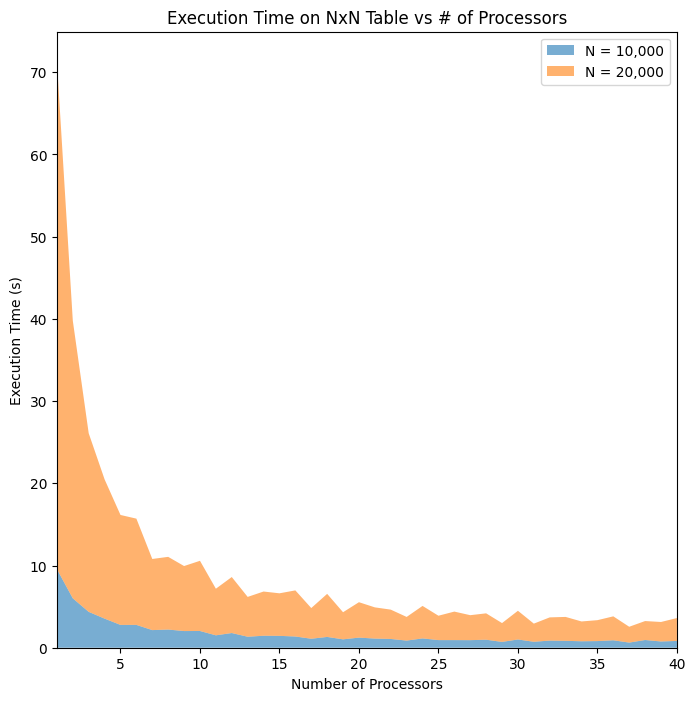

In [120]:
fig, ax = plt.subplots(figsize=(8,8))

# Stack plot of execution time speed up on different sized multiplication tables
ax.stackplot(N_10000["procs"],
             N_10000["execution_time"],
             N_20000["execution_time"], 
             alpha= 0.6, 
             labels=["N = 10,000", "N = 20,000"])

plt.legend()

# 1 -> 40 procs
plt.xlim(left = 1, right=40)

plt.title("Execution Time on NxN Table vs # of Processors")
plt.xlabel("Number of Processors")
plt.ylabel("Execution Time (s)")